<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/s24LinearModelNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

In [2]:
### Includes
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
####%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import math

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


[-14.25, 1.51, 5.32, 7.99, 11.56]


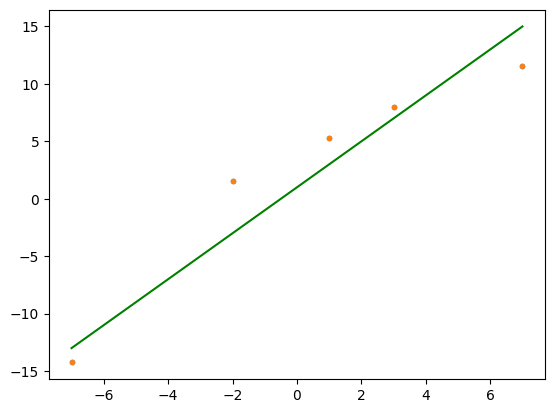

In [ ]:
eps = 10.0
coef = (1, 2)
w = (0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)


F = lambda w, x: w[0] + w[1]*x
X = [-7, -2, 1, 3, 7]
Y = [round(F(coef, x) + Noise(eps),2) for x in X]
print (Y)

plt.plot(X,Y,'.')
Hxs = [F(coef, x) for x in X]

plt.plot(X, Y, '.')
plt.plot(X, Hxs, '-', color="green")
plt.show()

In [ ]:
# Print Examples:
X = [-7, -2, 1, 3, 7]
Y = [-14.25, 1.51, 5.32, 7.99, 11.56]
Examples = list(zip(X,Y))

for p in Examples:
  print (p)

(-7, -14.25)
(-2, 1.51)
(1, 5.32)
(3, 7.99)
(7, 11.56)


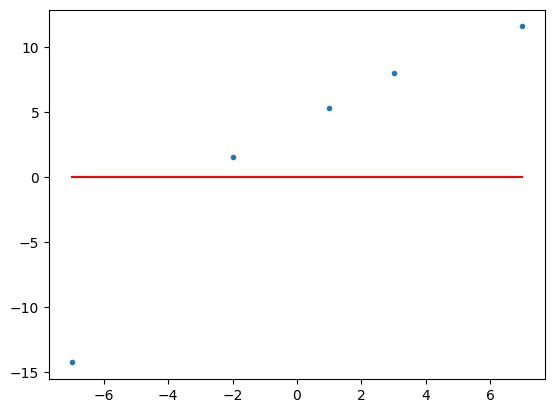

In [ ]:
# Plot Model
def PlotModel(X, Y, model):
  Hxs = [F(model, x) for x in X]

  plt.plot(X, Y, '.')
  plt.plot(X, Hxs, '-', color="red")
  plt.show()

PlotModel( X, Y , (0,0))

In [ ]:
SquaredError = lambda X, Y, w : sum([(y-F(w, x))**2 for x,y in zip(X,Y)])
SquaredErrorLogistic = lambda X, Y, w : sum([(y-G(F(w, x)))**2 for x,y in zip(X,Y)])


In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-F(w, x)) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [-14.25, 1.51, 5.32, 7.99, 11.56]
Predicts =  [0, 0, 0, 0, 0]
Errors= [99.75, -3.02, 5.32, 23.97, 80.92] 206.94 41.388


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (f"{model=}, {SquaredError(X, Y, model)=}")

model=(0, 0), SquaredError(X, Y, model)=431.1187
model=(0, 1), SquaredError(X, Y, model)=129.2387
model=(1, 0), SquaredError(X, Y, model)=411.8587
model=(1, 1), SquaredError(X, Y, model)=113.97870000000002
model=(1, 2), SquaredError(X, Y, model)=40.098699999999994


In [ ]:
## Average Gradients
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-14.25  99.75]
 [  1.51  -3.02]
 [  5.32   5.32]
 [  7.99  23.97]
 [ 11.56  80.92]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
for g in GradientBatch:
  print (f"{g=}")

[ 2.426 41.388]
g=2.426
g=41.388


In [ ]:
## Try Different Learning Rates
print (f"{w=}, {SquaredError(X, Y, w)=}")
for learningRate, model in [(learningRate, np.add(w, GradientBatch*learningRate)) for learningRate in (0.01, 0.1, 1.0)]:
  print (f"{model=}, {learningRate=}, {SquaredError(X, Y, model)=}")

w=[0, 0], SquaredError(X, Y, w)=431.1187
model=array([0.02426, 0.41388]), learningRate=0.01, SquaredError(X, Y, model)=278.461828946
model=array([0.2426, 4.1388]), learningRate=0.1, SquaredError(X, Y, model)=635.0997745999998
model=array([ 2.426, 41.388]), learningRate=1.0, SquaredError(X, Y, model)=175525.90795999998


In [ ]:
print (SquaredError(X, Y, (0.018, 0.452)))
print (SquaredError(X, Y, (0.18, 4.52)))


279.28821199999993
706.3411999999998


In [ ]:
# Algorithm Test
learningRate = 0.01
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Iterations = 0
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")

Iterations=0, w=[0, 0]  SquaredError(X, Y, w)=431.1187


In [ ]:
Iterations = Iterations + 1
GradientBatch = np.array([0.0, 0.0])
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
w = np.add(w, GradientBatch*learningRate)
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")
#print ( {SquaredError(X, Y, w)=})

[ 1.86799185 14.98369469]
Iterations=5, w=array([0.10580494, 1.32704477])  SquaredError(X, Y, w)=77.16954352288418


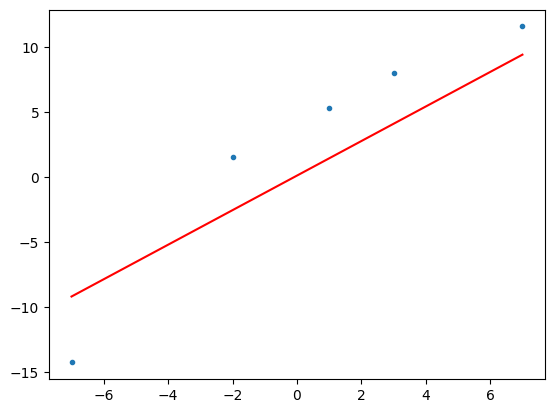

In [ ]:
PlotModel(X, Y, w)

model=(1.7, 1.82)


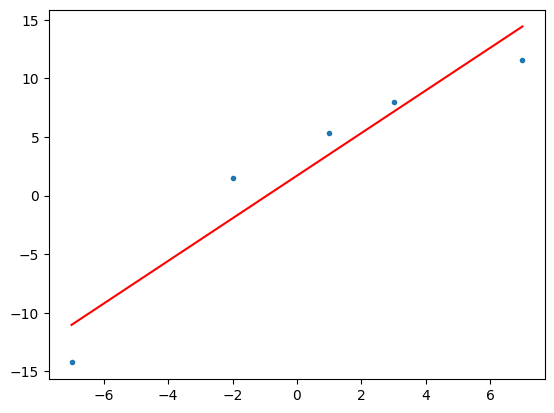

[-7, -2, 1, 3, 7] [-14.25, 1.51, 5.32, 7.99, 11.56]


In [ ]:
cv = np.cov(X, Y, bias=True, rowvar=False)
w1 = round(cv[1][0]/cv[0][0], 2)
w0 = round(np.mean(Y) - w1*np.mean(X), 2)
model = (w0, w1)
print (f"{model=}")
PlotModel(X, Y, model)
print (X, Y)

In [ ]:
learningRate = 0.01
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
totalIterations = 5000
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")
for i in range(totalIterations):
  GradientBatch = np.array([0.0, 0.0])
  Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
  for g in Gradients:
    GradientBatch += g
  GradientBatch = GradientBatch/len(Gradients)
  w = np.add(w, GradientBatch*learningRate)
print (f"{totalIterations=}, {w=}  {SquaredError(X, Y, w)=}")

Iterations=5, w=[0, 0]  SquaredError(X, Y, w)=431.1187
totalIterations=5000, w=array([1.69906475, 1.81733813])  SquaredError(X, Y, w)=34.42909208633094


# Logistic Regression

In [ ]:
G = lambda xIn: 1/(1+np.e**(-xIn))

In [ ]:
Predict = lambda x: 1.0 if x > 0.5 else 0.0
w = (0,0)
Y = [Predict(G(F(coef, x))) for x in X]
for x, y in zip(X, Y):
  print (x, y)

-7 0.0
-2 0.0
1 1.0
3 1.0
7 1.0


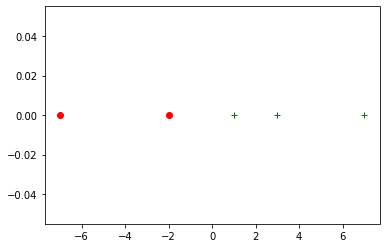

In [ ]:
def PlotLogisticData(X, Y, model):
  posX = []
  posY = []
  negX = []
  negY = []
  for x, y in zip(X,Y):
    if y:
      posX += [x]
      posY += [Predict(G(F(model,x)))]
    else:
      negX += [x]
      negY += [Predict(G(F(model,x)))]
  plt.plot(posX, posY, '+', color='green')
  plt.plot(negX, negY, 'o', color='red')
  plt.show()
PlotLogisticData(X, Y, w)

In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-G(F(w, x))) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [0.0, 0.0, 1.0, 1.0, 1.0]
Predicts =  [0, 0, 0, 0, 0]
Errors= [3.5, 1.0, 0.5, 1.5, 3.5] 10.0 2.0


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (model, SquaredErrorLogistic(X, Y, model), RoundIt(SquaredErrorLogistic(X, Y, model),0.1) )

(0, 0) 1.25 (1.2, 1.3)
(0, 1) 0.0887896982223366 (0.039, 0.139)
(1, 0) 1.2858817551625858 (1.236, 1.336)
(1, 1) 0.0868685548209095 (0.037, 0.137)
(1, 2) 0.004499256912790766 (-0.046, 0.054)


In [ ]:
## Average Gradients
w = ws[0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-G(F(w,x[1])))*x[0], (y-G(F(w,x[1])))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-0.5  3.5]
 [-0.5  1. ]
 [ 0.5  0.5]
 [ 0.5  1.5]
 [ 0.5  3.5]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
print (X, Y)

[0.1 2. ]
[-7, -2, 1, 3, 7] [0.0, 0.0, 1.0, 1.0, 1.0]


In [ ]:
wNew = np.add(w, GradientBatch*learningRate)
print (wNew)
print (w)
print (SquaredErrorLogistic(X, Y, (0,0)))
print (w, SquaredErrorLogistic(X, Y, w))
for model in [np.add(w, GradientBatch*learningRate) for learningRate in (1, 1)]:
  print (model, SquaredErrorLogistic(X, Y, model))
  print (model, RoundIt(model[0],0.1), RoundIt(model[1],1.0))

[0.01 0.2 ]
(0, 0)
1.25
(0, 0) 1.25
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.15) (1.5, 2.5)
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.15) (1.5, 2.5)


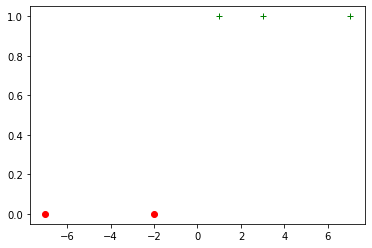

0.3010299956639812


In [ ]:
PlotLogisticData(X, Y, (0.1, 2))
print (np.log10(2))

In [ ]:
print (G(14.1))

0.9999992476022669


# More Logistic Regression


[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]


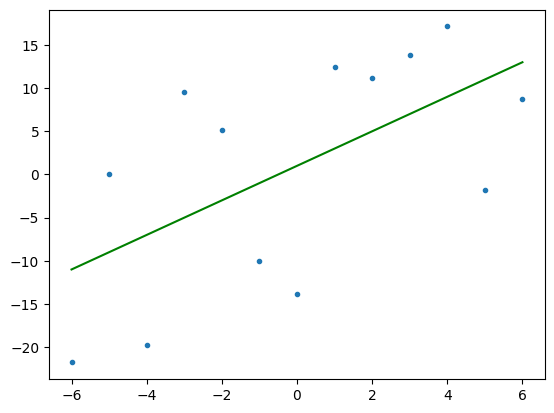

In [ ]:
F2 = lambda w, x: x[1] - w[0] - w[1]*x[0]
eps = 30.0
coef = (1, 2)
w = (0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)


X1 = range(-6, 7, 1)
X2 = [round(F(coef, x) + Noise(eps),2) for x in X1]
Y = [1 if F2(coef,x) > 0 else 0 for x in zip(X1, X2)]
print (Y)

plt.plot(X1, X2,'.')
Hxs = [F(coef, x) for x in X1]

plt.plot(X1, Hxs, '-', color="green")
plt.show()

In [5]:
def Separate(Data):
  pos = []
  neg = []
  for i in range(len(Data)):
    if Data[i][1]==0:
      neg.append(Data[i])
    else:
      pos.append(Data[i])
  return neg, pos

In [ ]:
X = list(zip(X1, X2))
Data = list(zip(X, Y))
neg, pos = Separate(Data)
print (f"{neg=} {pos=}")

neg=[((-6, -22.34), 0), ((-5, -9.14), 0), ((-4, -20.97), 0), ((-2, -10.24), 0), ((0, -4.65), 0), ((3, -2.45), 0)] pos=[((-3, 7.28), 1), ((-1, 3.88), 1), ((1, 3.6), 1), ((2, 6.4), 1), ((4, 23.09), 1), ((5, 19.25), 1), ((6, 26.18), 1)]


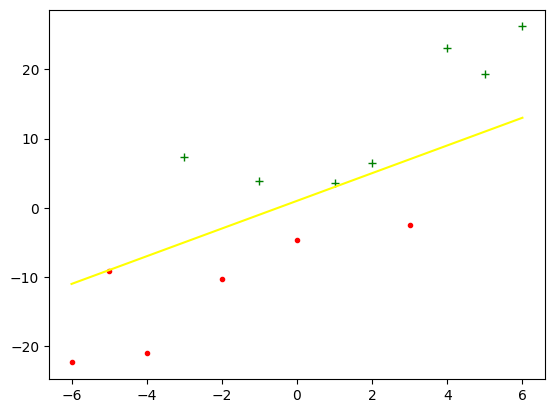

In [ ]:
negatives, positives = Separate(Data)
dataX1pos = [x[0] for x,y in positives]
dataX2pos = [x[1] for x,y in positives]
dataX1neg = [x[0] for x,y in negatives]
dataX2neg = [x[1] for x,y in negatives]

iteration = 0
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "r.")

Hxs = [F(coef, x) for x in X1]
plt.plot(X1, Hxs, '-', color="yellow")
plt.show()

# Example


In [12]:
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
Fx2 = lambda W, X: (W[0]*X[0]+W[1]*X[1])/(-1*W[2])
data = [((1,2,3),0), ((1,3,4),0), ((1,4,5),0), ((1,5,6),1), ((1,6,7),1), ((1,8,9),1) ]
data = [((1, -7, 10), 0), ((1, -3, 4), 0), ((1, 8, 7), 1), ((1, 1, 16), 0), ((1, 8, -4), 1), ((1, 9, 5), 1), ((1, -4, 14), 0), ((1, -1, -8), 1), ((1, -8, 0), 0), ((1, 8, 3), 1)] ## data2## data2

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

In [13]:
data = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0),
         ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0),
         ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0),
         ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0),
         ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0),
         ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0),
         ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0),
         ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1),
         ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1),
         ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1),
         ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1),
         ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1),
         ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1),
         ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1),
         ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2),
         ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2),
         ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2),
         ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2),
         ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2),
         ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2),
         ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2),
         ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]

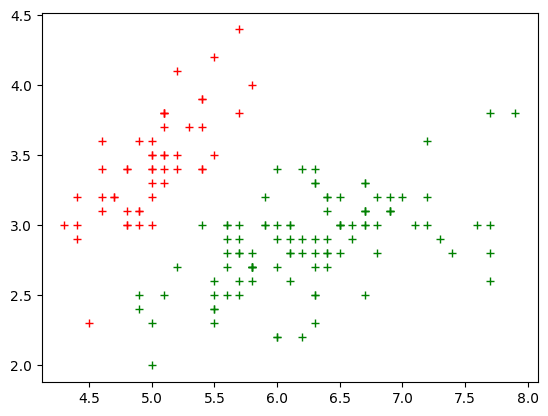

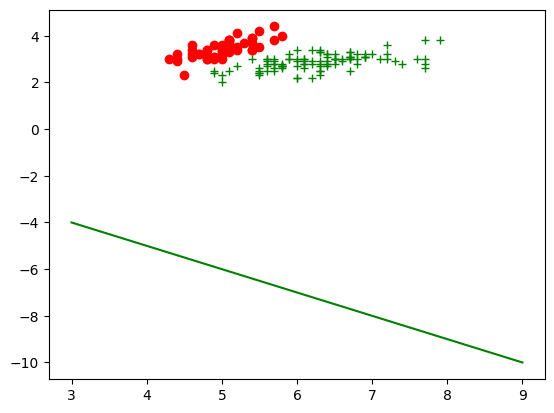

0 (0.001, 0.001, 0.001)


In [36]:
np.random.seed(22)
rangeValue = (3,10)
sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0
#model = [random.random(),random.random(),random.random()]
model=(0.001,0.001,0.001)
alpha = 0.1
alpha1 = 0.1 ## data 2 alpha
alpha2 = 0.1

X = [(d[0], d[1], d[2]) for d,_ in data]
Y = [y for _, y in data]

dataX1 = [x[1] for x,y in data]
dataX2 = [x[2] for x,y in data]

negatives, positives = Separate(data)
dataX1pos = [x[1] for x,y in positives]
dataX2pos = [x[2] for x,y in positives]
dataX1neg = [x[1] for x,y in negatives]
dataX2neg = [x[2] for x,y in negatives]

iteration = 0
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "r+")
plt.show()
YpredLine = [ Fx2(model, X) for X in zip([1]*(rangeValue[1]-rangeValue[0]+1), range(rangeValue[0], rangeValue[1]), [0]*(rangeValue[1]-rangeValue[0]+1)) ]
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "ro")
plt.plot(range(rangeValue[0], rangeValue[1]), YpredLine, "g")
plt.show()
print(iteration, model)


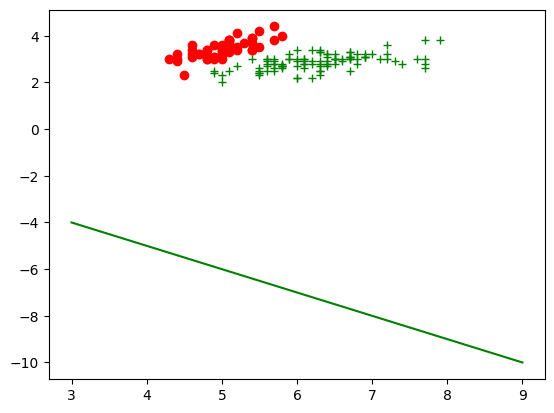

0 (0.001, 0.001, 0.001)


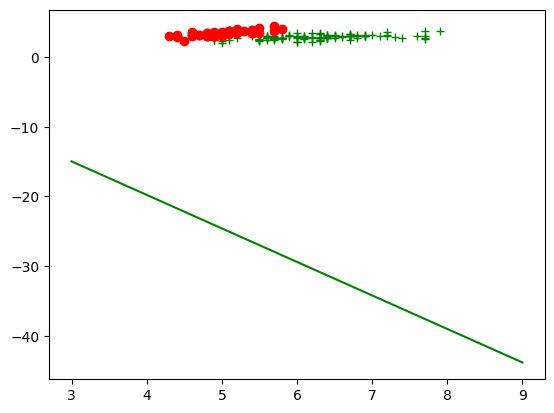

10 [0.03719158389993168, 0.33858927562721547, 0.07036368358678491]


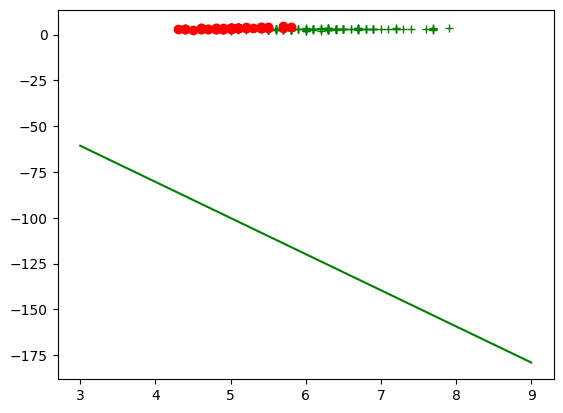

20 [0.029914403688717985, 0.3793162229334939, 0.019248111736648265]


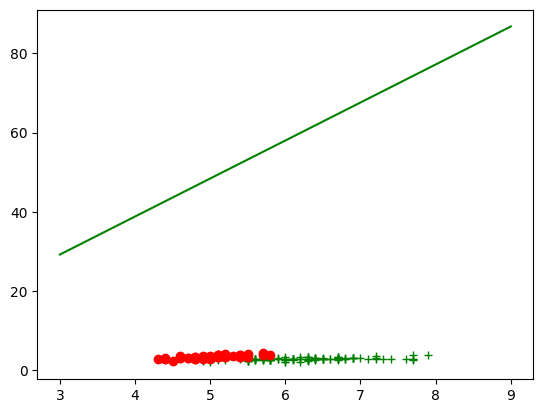

30 [0.019524011778922813, 0.40239201707780475, -0.04195409941470878]


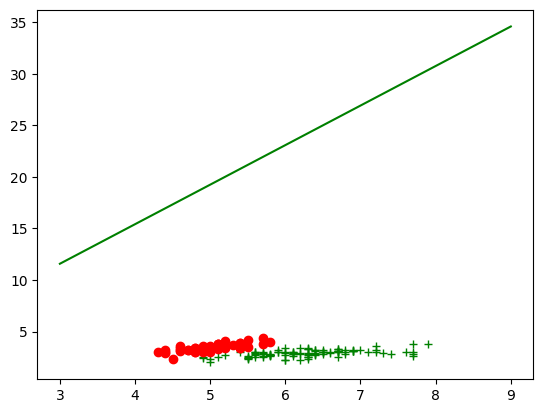

40 [0.007641963959389207, 0.42250003806934117, -0.11012778372286583]


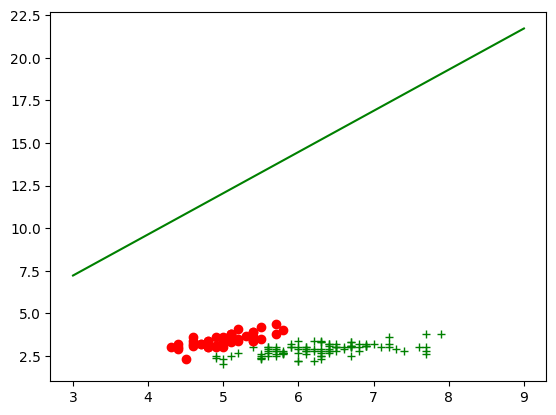

50 [-0.005139394433525741, 0.44463107808987656, -0.18402587497150932]


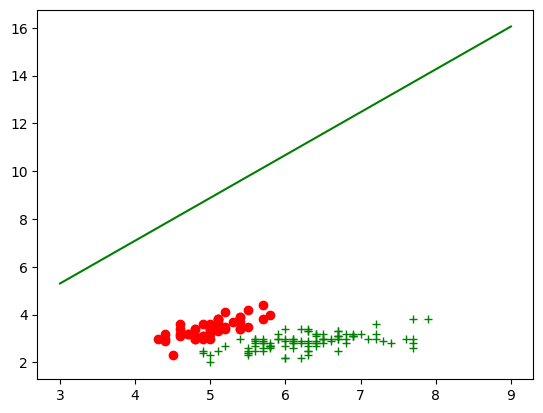

60 [-0.01850877771952353, 0.4705611398308249, -0.26267678119785925]


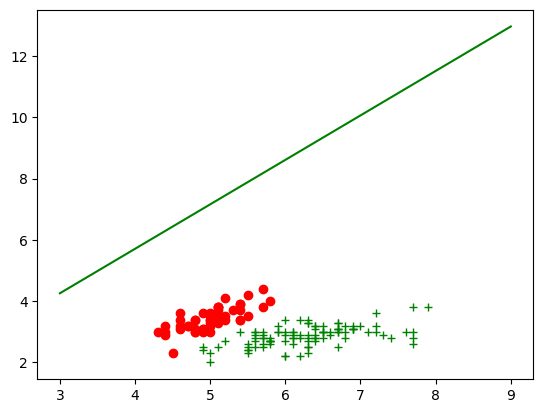

70 [-0.03227362801826262, 0.5005732166937356, -0.3451479596756229]


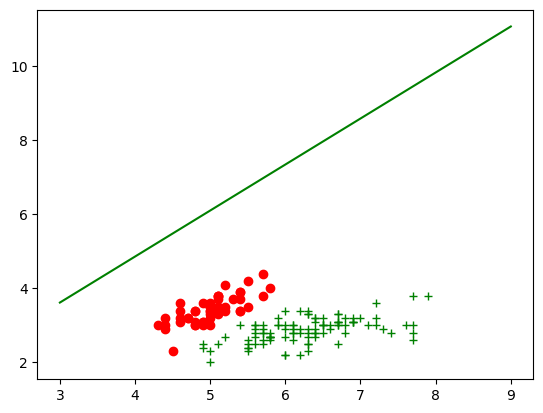

80 [-0.04628459841835359, 0.5343180400957924, -0.43046321523168807]


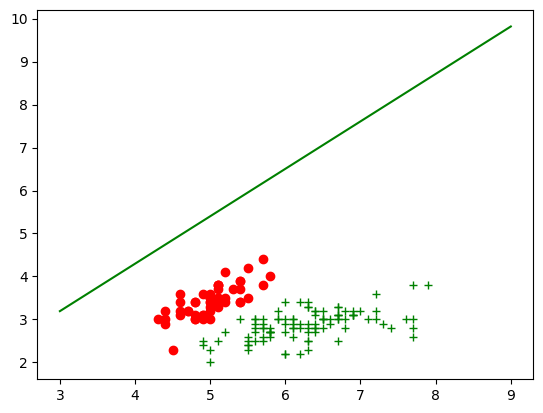

90 [-0.0604088462387872, 0.5712029325870476, -0.517612531583876]


In [32]:
iteration = 0
totalIterations = 100
printIterations = 10
for _ in range(totalIterations):
  yPredicted = [sigmoid(F(model, x)) for x in X]
  if iteration % printIterations  == 0:
    YpredLine = [ Fx2(model, X) for X in zip([1]*(rangeValue[1]-rangeValue[0]+1), range(rangeValue[0], rangeValue[1]), [0]*(rangeValue[1]-rangeValue[0]+1)) ]
    plt.plot(dataX1pos, dataX2pos, "g+")
    plt.plot(dataX1neg, dataX2neg, "ro")
    plt.plot(range(rangeValue[0], rangeValue[1]), YpredLine, "g")
    plt.show()
    print(iteration, model)
  Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
  if (iteration+1)%1000==0:
    print("Iteration: ", iteration, "Error=", Error, model)
    #plt.plot(dataX1, yPredicted, "r+")
    #plt.plot(dataX1, Y, "g+")
    #plt.show()
  deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX2 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[2]) for r,y,x in zip(Y, yPredicted, X)] )

  model = [model[0]-alpha1*deltaX0, model[1]-alpha1*deltaX1, model[2]-alpha1*deltaX2]
  iteration += 1

In [37]:
iteration = 0
totalIterations = 20000
printIterations = 1000
for _ in range(totalIterations):
  yPredicted = [sigmoid(F(model, x)) for x in X]
  Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
  if iteration%printIterations==0:
    print("Iteration: ", iteration, "Error=", Error, model)
    #plt.plot(dataX1, yPredicted, "r+")
    #plt.plot(dataX1, Y, "g+")
    #plt.show()
  deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
  deltaX2 = 1/len(Y)*sum( [(-2*(r-y)*sigmoid(F(model, x))*(1-sigmoid(F(model, x)))*x[2]) for r,y,x in zip(Y, yPredicted, X)] )

  model = [model[0]-alpha1*deltaX0, model[1]-alpha1*deltaX1, model[2]-alpha1*deltaX2]
  iteration += 1

Iteration:  0 Error= 137.101455146 (0.001, 0.001, 0.001)
Iteration:  1000 Error= 57.380701984069205 [-0.6773108918011548, 2.4530665115259964, -3.8046176299386762]
Iteration:  2000 Error= 54.716491233935564 [-0.9601269886488688, 3.127487893247375, -4.8918506582973]
Iteration:  3000 Error= 53.73595724935825 [-1.157193782694879, 3.542661450662354, -5.551687702542771]
Iteration:  4000 Error= 53.20709828059931 [-1.3147679074121672, 3.848777338261136, -6.033527778665625]
Iteration:  5000 Error= 52.86981391028919 [-1.448761597627192, 4.093609417003479, -6.415966239100196]
Iteration:  6000 Error= 52.63319706990241 [-1.5667624799636353, 4.298787016985267, -6.734400373870733]
Iteration:  7000 Error= 52.45663227093321 [-1.6730520552552721, 4.476035665149503, -7.00794351946081]
Iteration:  8000 Error= 52.31904758230514 [-1.7703133467562024, 4.632463171400545, -7.248143262475614]
Iteration:  9000 Error= 52.20834181019607 [-1.8603533438163469, 4.772721260416101, -7.462534718272726]
Iteration:  10000

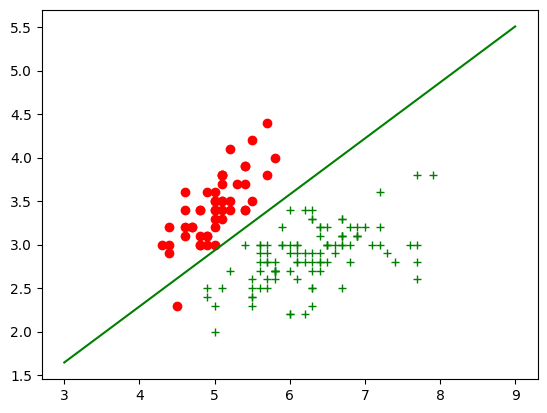

In [38]:
model = [-2.539199432207093, 5.714317984749782, -8.876870949270439]
YpredLine = [ Fx2(model, X) for X in zip([1]*(rangeValue[1]-rangeValue[0]+1), range(rangeValue[0], rangeValue[1]), [0]*(rangeValue[1]-rangeValue[0]+1)) ]
plt.plot(dataX1pos, dataX2pos, "g+")
plt.plot(dataX1neg, dataX2neg, "ro")
plt.plot(range(rangeValue[0], rangeValue[1]), YpredLine, "g")
plt.show()
